<h1>Big Data & Data Analytics Project on Job Change Prediction using Python</h1>
<p>By Prachi Goel(035041), Prachi Dua(035040), Aakriti Pathania(035001), </p>
<h2>Introduction</h2>
<p>In this project we tried to explore and visualize the job change prediction dataset using python to test and train our machine leanring model.</p>
<h2>Objectives of the Project:</h2>
<p>1. Exploration & Visualizion the data <br>2. To examine if data has any structure<br>3. To do the Feature Engineering of data<br>4. To create the Data Pipelining<br>5. Perform the Hyperparameter tuning</p>
<h2>About Dataset</h2>
<p>An Ed-Tech company wants to hire data scientists among people who have successfully passed some courses and then signed up for training. The company wants to know which of the people are looking for a job change and will prefer working with them after completion of training because it helps to reduce the cost and time for categorization of candidates.

Information related to demographics, education, the experience is in hands from candidates sign up and enrollment.</p>


# This dataset is composed by the following variables:

**enrollee_id:** Unique ID for the candidate

**city:** City code

**city_ development _index:** Development index of the city (scaled)

**gender:** Gender of the candidate

**relevent_experience:** Relevant experience of the candidate

**enrolled_university:** Type of University course enrolled if any

**education_level:** Education level of candidate

**major_discipline:** Education major discipline of the candidate

**experience:** Candidate total experience in years

**company_size:** No of employees in current employer's company

**company_type:** Type of current employer

**lastnewjob:** Difference in years between previous job and current job

**training_hours:** training hours completed

**target:** 0 – Not looking for a job change, 1 – Looking for a job change

# Notebook outline:

1. Data Analysis and Visualization
    - Dataset Information
    - Visualizations
2. Data Preprocessing
    - Data Encoding
3. Models Training and Evaluation
    - Splitting data into train and test set
    - Training Base Models
    - Evaluation of Base Models
    - Hyperparameter Tuning
    - Evaluation of Tuned Models

What is City Development Index?

The City Development Index was developed for the Second United Nations Conference on Human Settlements (Habitat II) in 1996 and measures the level of development in cities. The Urban Indicators Programme of the United Nations Human Settlements Programme (UN-Habitat) developed the indicator so that they could rank cities of the world according to their level of development and as a display of indicators depicting development. The CDI cuts across the different clusters identified in the Urban Indicator Framework as it is based on five sub-indices namely, infrastructure, waste, health, education, and city product. It is useful as it provides a snap-shot view of how cities are doing concerning the different indices

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

SEED = 0

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Some basic libraries ...

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

I will load the dataset by using pandas the standard python approach for dealing with data.

In [6]:
data = pd.read_csv("C:\\Users\\user\\Downloads\\archive\\aug_train.csv")
test = pd.read_csv("C:\\Users\\user\\Downloads\\archive\\aug_test.csv")

# 1. Data Analysis and Visualization

In [27]:
data.head(5)


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [26]:
test.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


## Dataset information:

+ enrollee_id : Unique ID for enrollee
+ city: City code
+ citydevelopmentindex: Developement index of the city (scaled)
+ gender: Gender of enrolee
+ relevent_experience: Relevent experience of enrolee
+ enrolled_university: Type of University course enrolled if any
+ education_level: Education level of enrolee
+ major_discipline :Education major discipline of enrolee
+ experience: Enrolee total experience in years
+ company_size: No of employees in current employer's company
+ company_type : Type of current employer
+ lastnewjob: Difference in years between previous job and current job
+ training_hours: training hours completed
+ target: 0 – Not looking for job change, 1 – Looking for a job change

... and try to check the type of the data types.

In [9]:
data.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [33]:
data.describe(include = 'object').T

,count,unique,top,freq
city,19158,123,city_103,4355
gender,14650,3,Male,13221
relevent_experience,19158,2,Has relevent experience,13792
enrolled_university,18772,3,no_enrollment,13817
education_level,18698,5,Graduate,11598
major_discipline,16345,6,STEM,14492
experience,19093,22,>20,3286
company_size,13220,8,50-99,3083
company_type,13018,6,Pvt Ltd,9817
last_new_job,18735,6,1,8040


**But, "Categorical variables"**

We need to deal with categorical variables so columns which have values different than numbers. 

A simple way of selecting all categorical columns is by checking their type.

Thus, In the database, only 4 columns are of numerical-data, and up to 10 columns are Categorical variables type.

In [10]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [34]:
for column in ['gender','enrolled_university','education_level','major_discipline', 'experience', 'company_size', 'company_type','last_new_job']:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [35]:
data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [37]:
df = data.drop(columns=["gender"])
df = data.drop(columns=["major_discipline"])

In [38]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [40]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler,PolynomialFeatures,PowerTransformer,OneHotEncoder


In [41]:
x = df.drop(columns='target')
y = df['target']

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.80,stratify=y,random_state=42)

## Visualizations

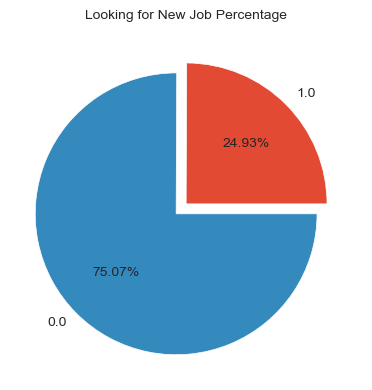

In [32]:
# 14000 people are not looking for a job change and on the other hand approximately 5000 people are willing to change their jobs.
#Churn vs. normal 
sizes = list(data['target'].value_counts().sort_values().values)
labels = list(data['target'].value_counts().sort_values().index)

explode = [0, 0.1]

plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, explode = explode,
        autopct=lambda p:f'{p:.2f}%')
plt.title('Looking for New Job Percentage', fontsize=10)
plt.tight_layout()
plt.show()

Next, let's look at the frequency of each category separated the histogram charts to check if there is any special information to distinguish whether the result of the "target" is 0 - Not looking for job change, OR, 1 - Looking for a job change.

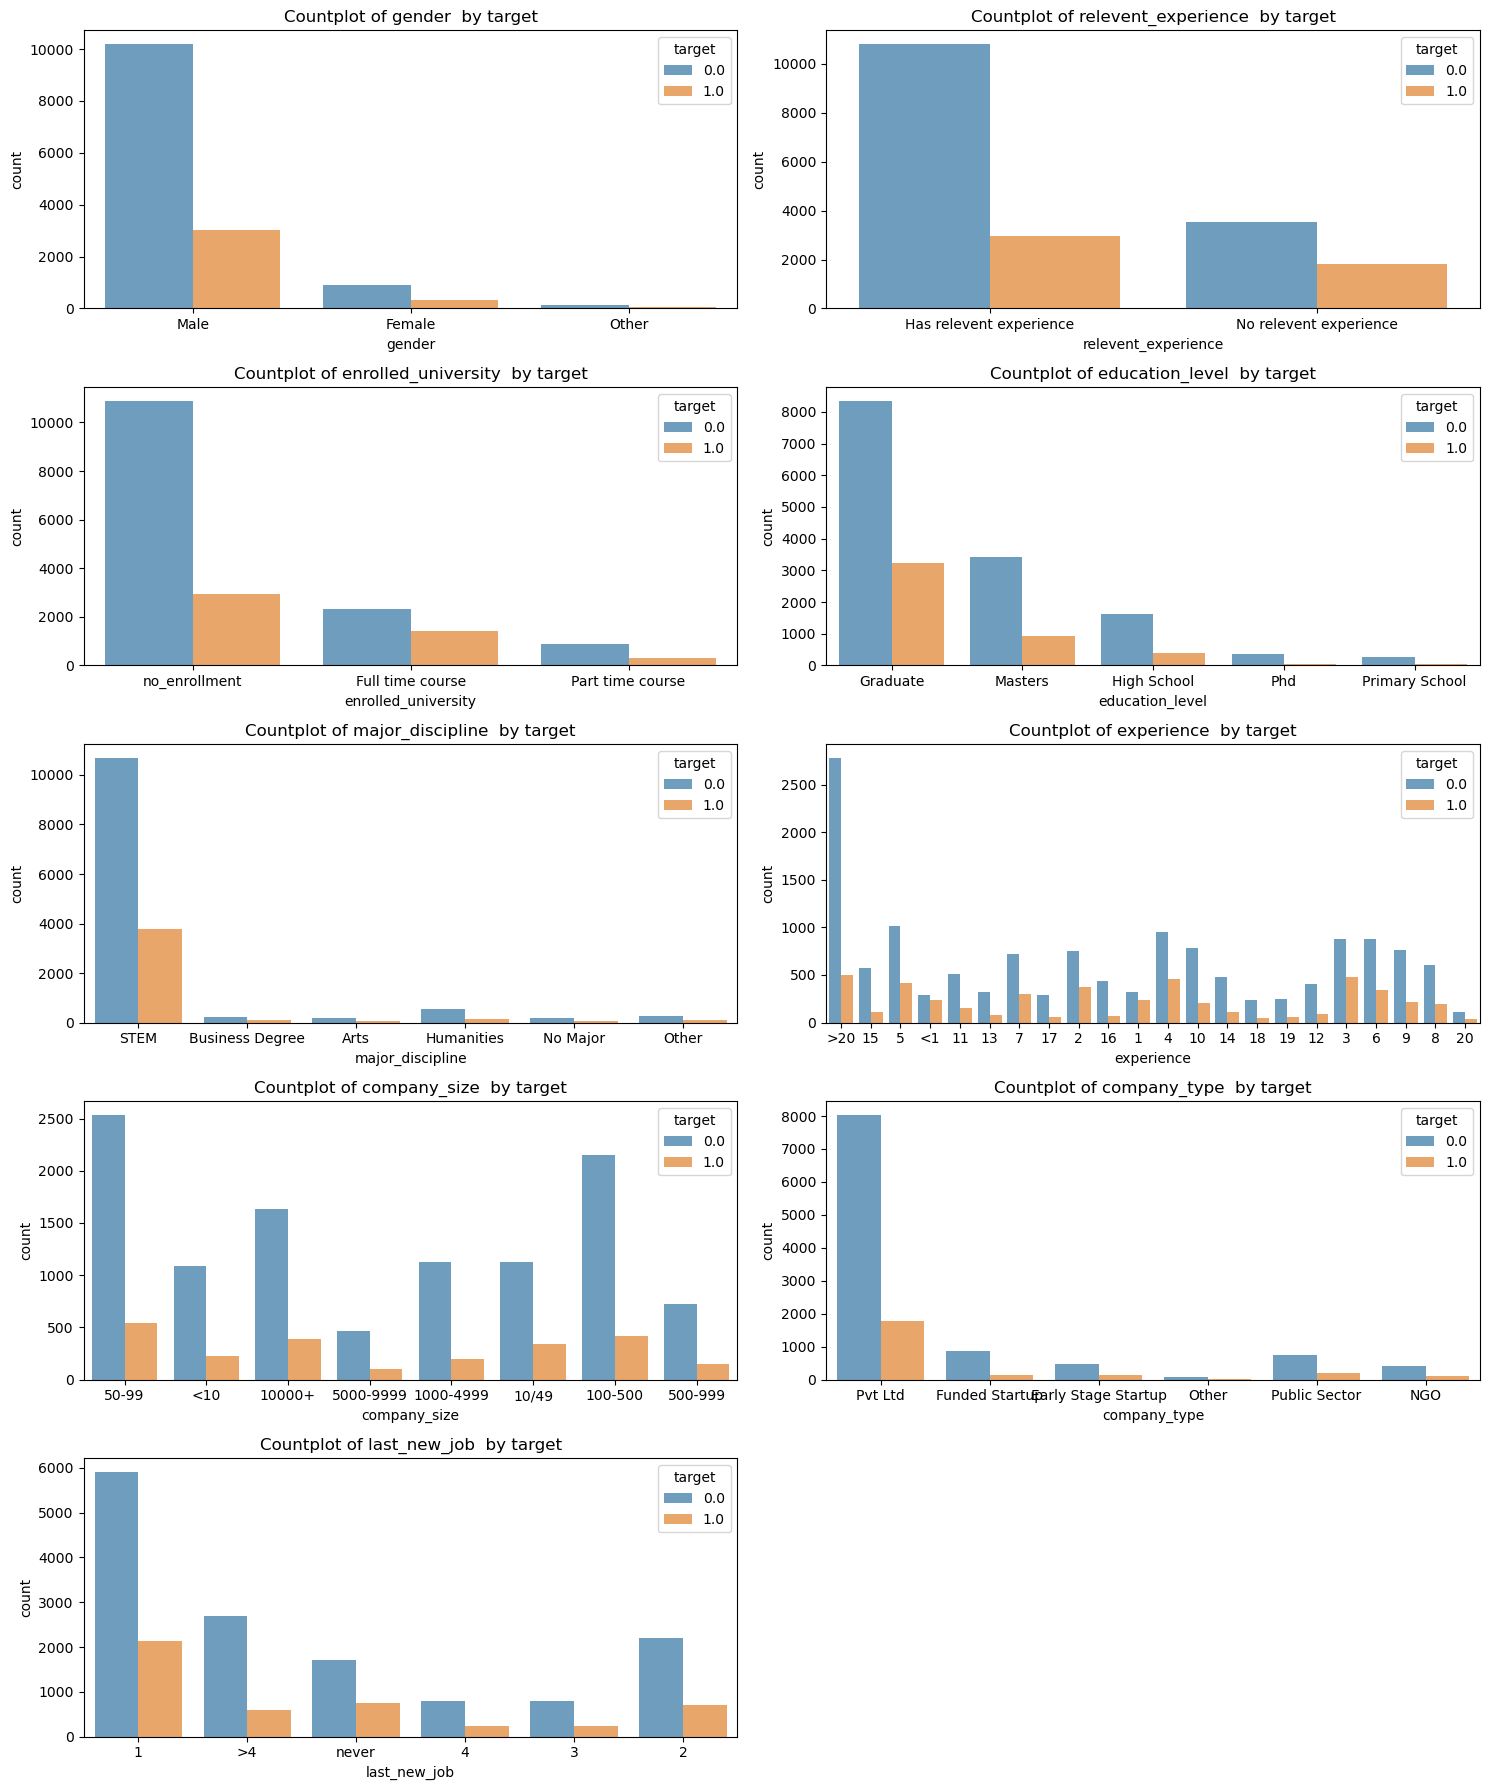

In [12]:
#Frequency of each category separated by label
plt.figure(figsize=[15,18])
features = ['gender','relevent_experience','enrolled_university','education_level', 'major_discipline',
       'experience','company_size','company_type','last_new_job']
n=1
for f in features:
    plt.subplot(5,2,n)
    sns.countplot(x=f, hue='target', alpha=0.7, data=data)
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

From these histogram charts, it can be seen, there is no special correlation between the variables with the target function to distinguish the value of the target. Furthermore, categorical variables cannot determine the correlation factor between these variables and the target function.

In [13]:
np.array(data.columns[data.dtypes != object])

array(['enrollee_id', 'city_development_index', 'training_hours',
       'target'], dtype=object)

# 2. Data Preprocessing

In [14]:
import copy
df_train=copy.deepcopy(data)
df_test=copy.deepcopy(test)

cols=np.array(data.columns[data.dtypes != object])
for i in df_train.columns:
    if i not in cols:
        df_train[i]=df_train[i].map(str)
        df_test[i]=df_test[i].map(str)
df_train.drop(columns=cols,inplace=True)
df_test.drop(columns=np.delete(cols,len(cols)-1),inplace=True)

In [15]:
df_train.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

We will assign each categorical variable value a number, so let’s say [A, B, A, F] named values will map to [1, 2, 1, 3]. To do that we will use LabelEncoder from sklearn.preprocessing package, as following.

## Data Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build dictionary function
cols=np.array(data.columns[data.dtypes != object])
d = defaultdict(LabelEncoder)

# only for categorical columns apply dictionary by calling fit_transform 
df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))
df_test=df_test.apply(lambda x: d[x.name].transform(x))
df_train[cols]=data[cols]
df_test[np.delete(cols,len(cols)-1)]=test[np.delete(cols,len(cols)-1)]

Now examine the results, considering the correlation between "pseudo categorical variables" and the "target" objective function.

In [17]:
df_train.dtypes

city                        int32
gender                      int32
relevent_experience         int32
enrolled_university         int32
education_level             int32
major_discipline            int32
experience                  int32
company_size                int32
company_type                int32
last_new_job                int32
enrollee_id                 int64
city_development_index    float64
training_hours              int64
target                    float64
dtype: object

In [18]:
df_test.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'enrollee_id', 'city_development_index',
       'training_hours'],
      dtype='object')

Text(0.5, 1.0, 'Heatmap of all the Features of Train data set')

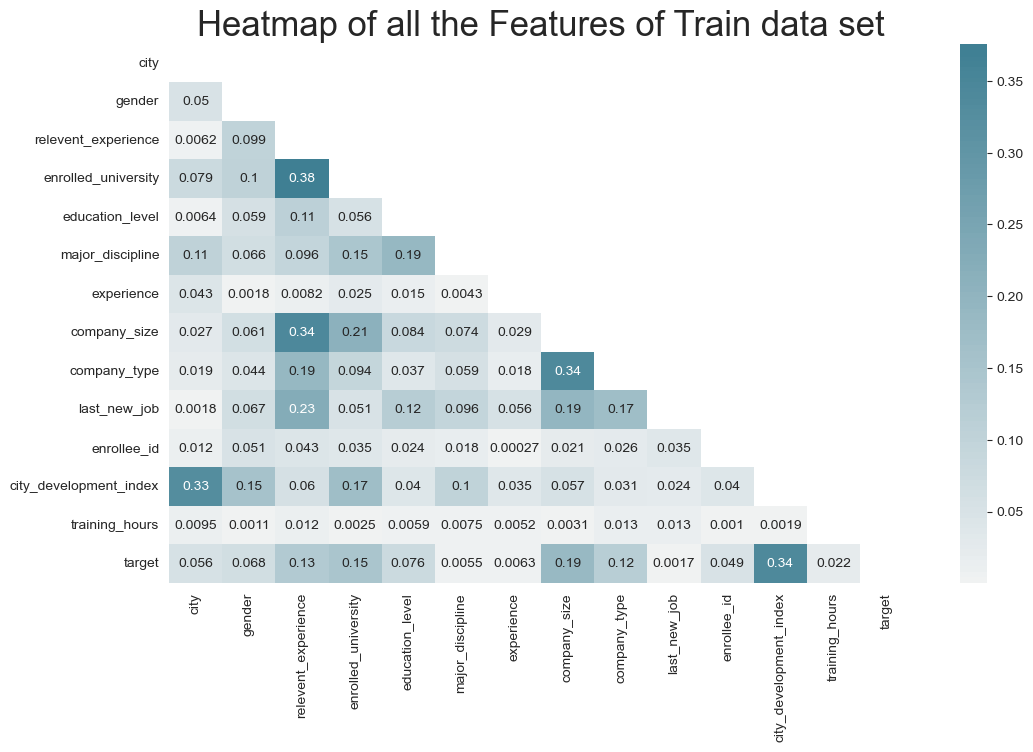

In [19]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))
## Plotting heatmap. # Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_train.corr().apply(abs), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_train.corr().apply(abs), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, )
plt.title("Heatmap of all the Features of Train data set", fontsize = 25)

From the above heatmap we can clearly observe that the target has a high dependance on the city_development_index which means candidates from city with higher amount of development index tends to move towards the field of data science.

<AxesSubplot: xlabel='target', ylabel='training_hours'>

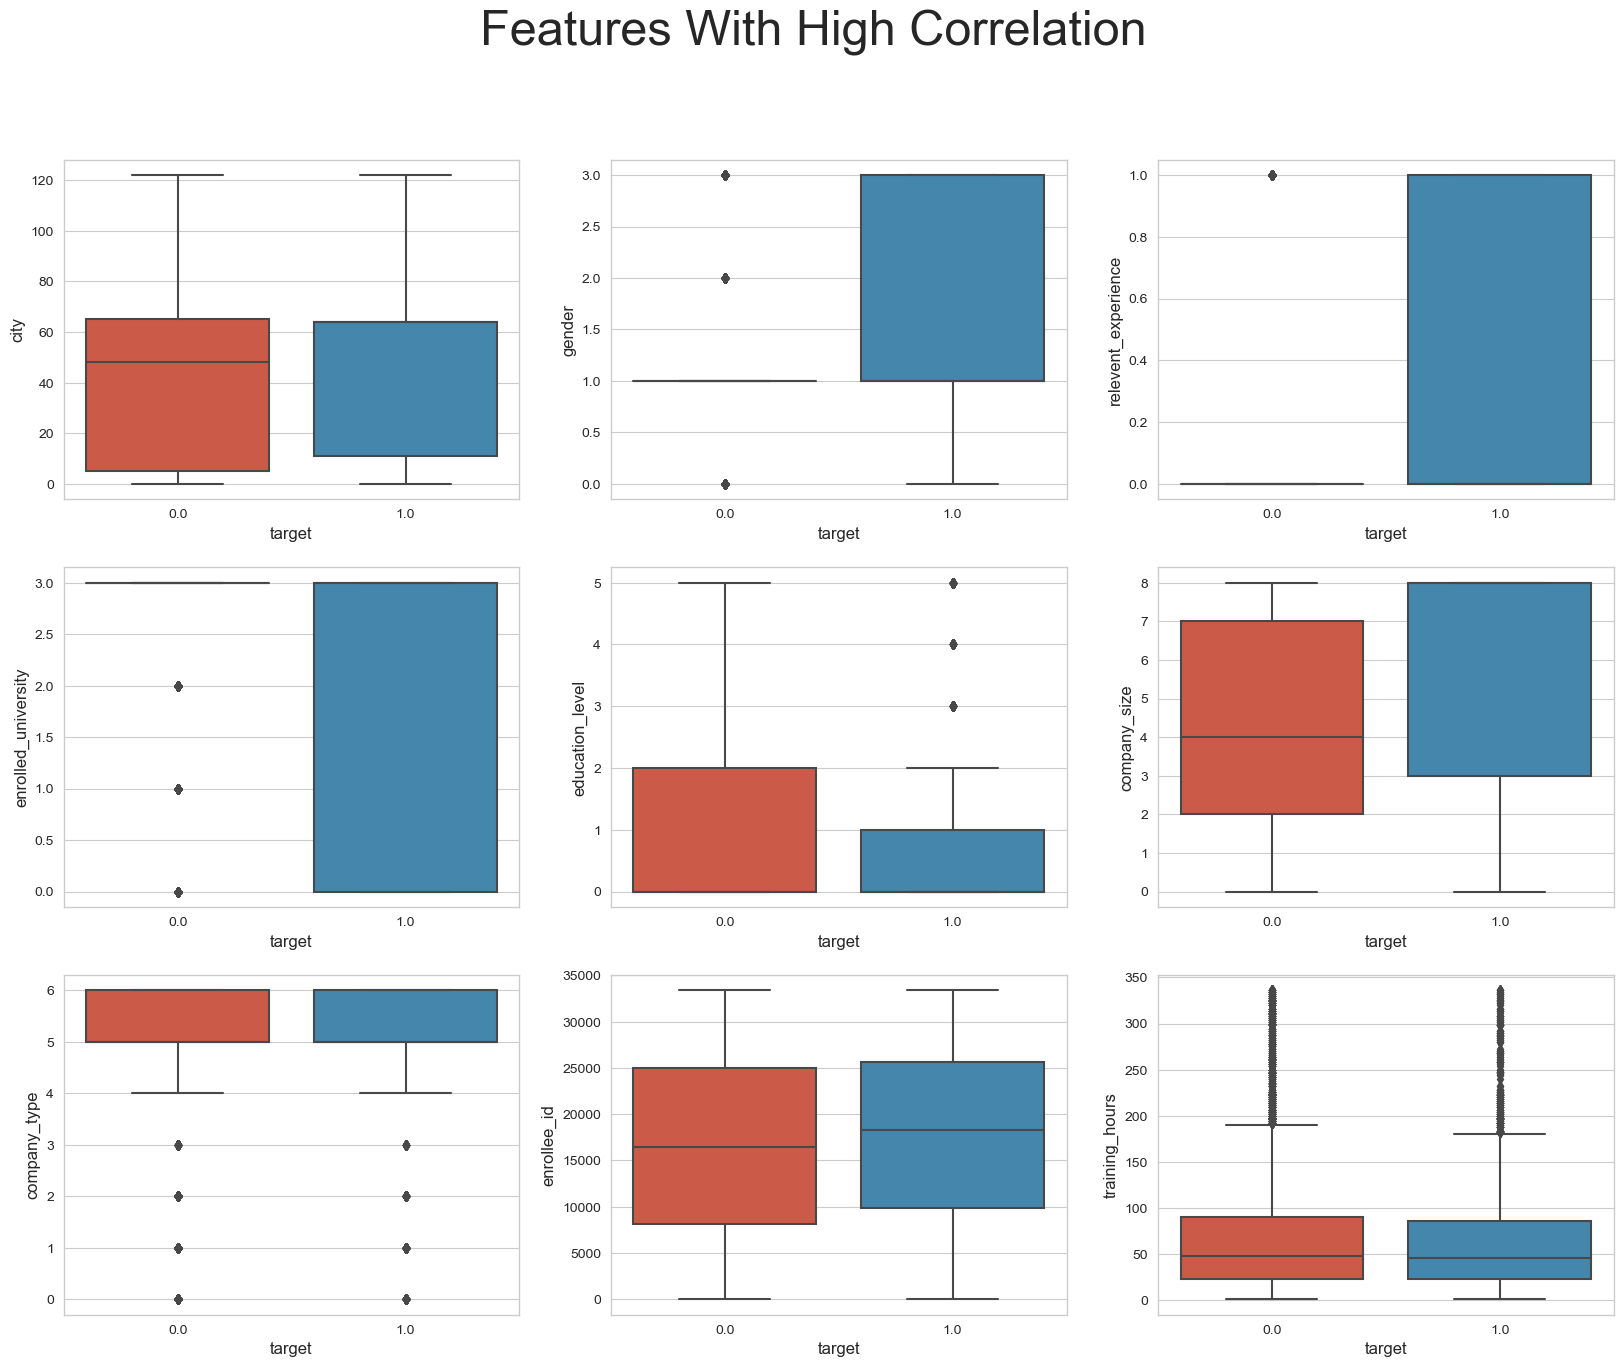

In [20]:
# visualizing the features whigh positive and negative correlation
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))

f.suptitle('Features With High Correlation', size=35)
sns.boxplot(x="target", y="city", data=df_train, ax=axes[0,0])
sns.boxplot(x="target", y="gender", data=df_train, ax=axes[0,1])
sns.boxplot(x="target", y='relevent_experience', data=df_train, ax=axes[0,2])
sns.boxplot(x="target", y='enrolled_university', data=df_train, ax=axes[1,0])
sns.boxplot(x="target", y='education_level', data=df_train, ax=axes[1,1])
sns.boxplot(x="target", y='company_size', data=df_train, ax=axes[1,2])
sns.boxplot(x="target", y='company_type', data=df_train, ax=axes[2,0])
sns.boxplot(x="target", y='enrollee_id', data=df_train, ax=axes[2,1])
sns.boxplot(x="target", y='training_hours', data=df_train, ax=axes[2,2])

In [21]:
counts = data.target.value_counts()
not_change = counts[0]
change = counts[1]
perc_not_change = not_change*100/ sum(counts)
perc_change = change*100/ sum(counts)
print('There were {} not_change ({:.2f}%) and {} change ({:.2f}%).'.format(not_change, perc_not_change, change, perc_change))

There were 14381 not_change (75.07%) and 4777 change (24.93%).


From this we can clearly see that the target 0 is in majority which will effect our model so we will use SMOTE (Synthetic Minority Over-sampling Technique) which will help us to create more synthetic data for the minority class 1 :)
    

# 3. Model Training and Evaluation

In [43]:
# imports for training and evaluation
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV

## Splitting data into train and test set

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)
print("Data splitting complete")

NameError: name 'X' is not defined

In [27]:
# helper functions
def evaluate(model, X, y):
    preds = model.predict(X)
    
    labels = [0,1]
    target_names = ["not_change","change"]
    
    cm = confusion_matrix(y, preds)
    cr = classification_report(y, preds, labels=labels, target_names=target_names)
    
    fig, ax = plt.subplots()
    print(cr)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', ax=ax)
    plt.show()
    
    return preds
    
def test_model(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, scorer=None):
    model.fit(X_train,y_train)
        
    train_preds = evaluate(model, X_train, y_train)
    test_preds = evaluate(model, X_test, y_test)
    
    return train_preds, test_preds

def plot_preds(model_names, y_true, preds_list, show_value=False, scorer='accuracy'):
    xval = model_names
    if scorer=='accuracy':
        yval = [accuracy_score(y_true, y_pred) for y_pred in preds_list]
    elif scorer in ['f1 score','f1']:
        yval = [f1_score(y_true, y_pred) for y_pred in preds_list]
    plt.figure(figsize=(12,6))
    plt.ylim(ymax = min(100,max(yval)*1.1), ymin = min(yval)*0.8)
    plt.ylabel(scorer)
    plt.xticks(rotation=45)
    
    s = sns.barplot(xval,yval)
    if show_value:
        for x,y in zip(range(len(yval)),yval):
            s.text(x,y+0.1,round(y,2),ha="center")

In [45]:
train_preds = dict()
test_preds = dict()

## Training Base Models

### A. Logistic Regression

              precision    recall  f1-score   support

  not_change       0.62      0.58      0.60     10856
      change       0.60      0.64      0.62     10715

    accuracy                           0.61     21571
   macro avg       0.61      0.61      0.61     21571
weighted avg       0.61      0.61      0.61     21571



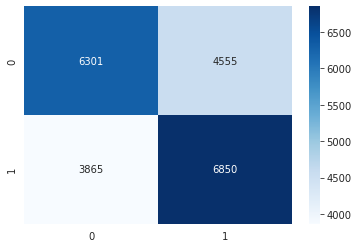

              precision    recall  f1-score   support

  not_change       0.60      0.58      0.59      3525
      change       0.61      0.63      0.62      3666

    accuracy                           0.61      7191
   macro avg       0.61      0.61      0.61      7191
weighted avg       0.61      0.61      0.61      7191



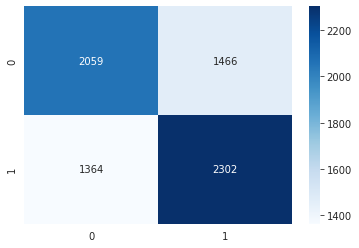

In [29]:
train_preds["LR"],test_preds["LR"] = test_model(LogisticRegression());

### B. kNN (k- Nearest Neighbors)

              precision    recall  f1-score   support

  not_change       0.85      0.79      0.82     10856
      change       0.80      0.86      0.83     10715

    accuracy                           0.83     21571
   macro avg       0.83      0.83      0.83     21571
weighted avg       0.83      0.83      0.83     21571



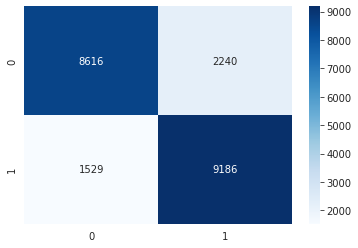

              precision    recall  f1-score   support

  not_change       0.75      0.69      0.72      3525
      change       0.72      0.78      0.75      3666

    accuracy                           0.74      7191
   macro avg       0.74      0.74      0.74      7191
weighted avg       0.74      0.74      0.74      7191



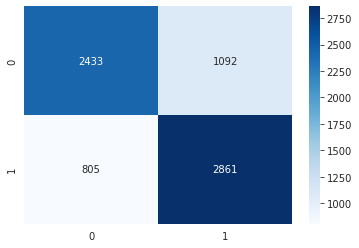

In [31]:
train_preds["KNN"],test_preds["KNN"] = test_model(KNeighborsClassifier());

### C. Random Forest

              precision    recall  f1-score   support

  not_change       1.00      1.00      1.00     10856
      change       1.00      1.00      1.00     10715

    accuracy                           1.00     21571
   macro avg       1.00      1.00      1.00     21571
weighted avg       1.00      1.00      1.00     21571



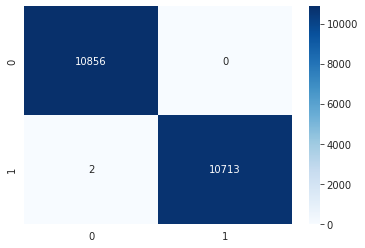

              precision    recall  f1-score   support

  not_change       0.85      0.87      0.86      3525
      change       0.87      0.85      0.86      3666

    accuracy                           0.86      7191
   macro avg       0.86      0.86      0.86      7191
weighted avg       0.86      0.86      0.86      7191



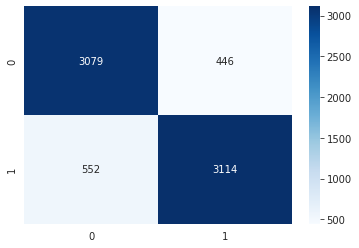

In [32]:
train_preds["RF"],test_preds["RF"] = test_model(RandomForestClassifier());

### D. Light GBM

### Evaluation of Base Models

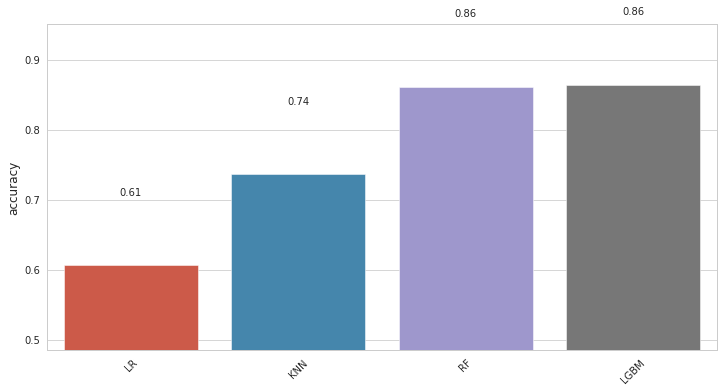

In [34]:
plot_preds(list(test_preds.keys()),y_test,list(test_preds.values()), 1)

### A. Logistic Regression

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Params for LogisticRegression():
C : 0.1
penalty : l2
solver : newton-cg

              precision    recall  f1-score   support

  not_change       0.74      0.77      0.76     10856
      change       0.76      0.72      0.74     10715

    accuracy                           0.75     21571
   macro avg       0.75      0.75      0.75     21571
weighted avg       0.75      0.75      0.75     21571



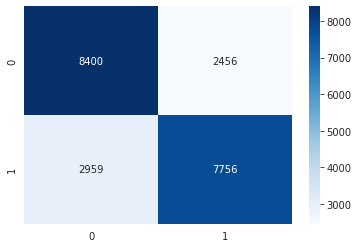

              precision    recall  f1-score   support

  not_change       0.72      0.77      0.75      3525
      change       0.76      0.72      0.74      3666

    accuracy                           0.74      7191
   macro avg       0.74      0.74      0.74      7191
weighted avg       0.74      0.74      0.74      7191



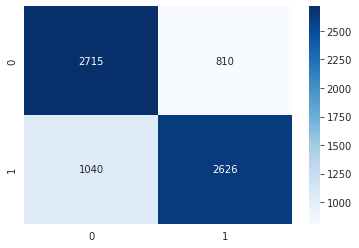

In [37]:
model = LogisticRegression()

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1]

grid = dict(solver=solvers,penalty=penalty,C=c_values)

tuned_train_preds["LR"],tuned_test_preds["LR"] = test_model(LogisticRegression(**best_params(model,grid)));

### B. SVM

### C. K-Nearest Neighbors

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Params for KNeighborsClassifier():
metric : manhattan
n_neighbors : 9
weights : distance

              precision    recall  f1-score   support

  not_change       1.00      1.00      1.00     10856
      change       1.00      1.00      1.00     10715

    accuracy                           1.00     21571
   macro avg       1.00      1.00      1.00     21571
weighted avg       1.00      1.00      1.00     21571



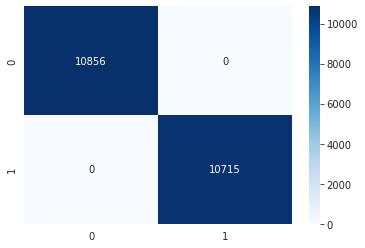

              precision    recall  f1-score   support

  not_change       0.80      0.70      0.75      3525
      change       0.74      0.83      0.79      3666

    accuracy                           0.77      7191
   macro avg       0.77      0.77      0.77      7191
weighted avg       0.77      0.77      0.77      7191



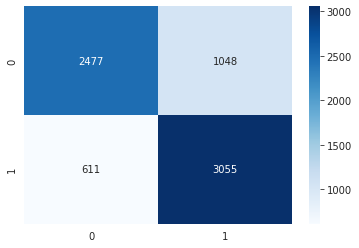

In [39]:
model = KNeighborsClassifier()

n_neighbors = [9,11,13,15]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

tuned_train_preds["KNN"],tuned_test_preds["KNN"] = test_model(KNeighborsClassifier(**best_params(model,grid)));

### D. Random Forest

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Params for RandomForestClassifier():
max_depth : None
min_samples_split : 7
n_estimators : 100

              precision    recall  f1-score   support

  not_change       0.95      0.99      0.97     10856
      change       0.99      0.94      0.97     10715

    accuracy                           0.97     21571
   macro avg       0.97      0.97      0.97     21571
weighted avg       0.97      0.97      0.97     21571



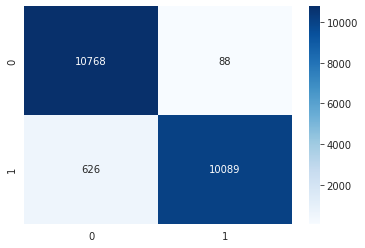

              precision    recall  f1-score   support

  not_change       0.85      0.87      0.86      3525
      change       0.87      0.85      0.86      3666

    accuracy                           0.86      7191
   macro avg       0.86      0.86      0.86      7191
weighted avg       0.86      0.86      0.86      7191



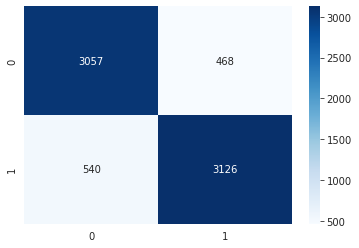

In [40]:
model = RandomForestClassifier()

n_estimators = [50, 100, 500]
max_features = ['auto','sqrt', 'log2']
max_depth = [5,8,10,None]
min_samples_split = [3,5,7,9]
grid = dict(n_estimators=n_estimators,# max_features=max_features,
            max_depth=max_depth,min_samples_split=min_samples_split)

tuned_train_preds["RF"],tuned_test_preds["RF"] = test_model(RandomForestClassifier(**best_params(model,grid)));

### Evaluation of Tuned Models

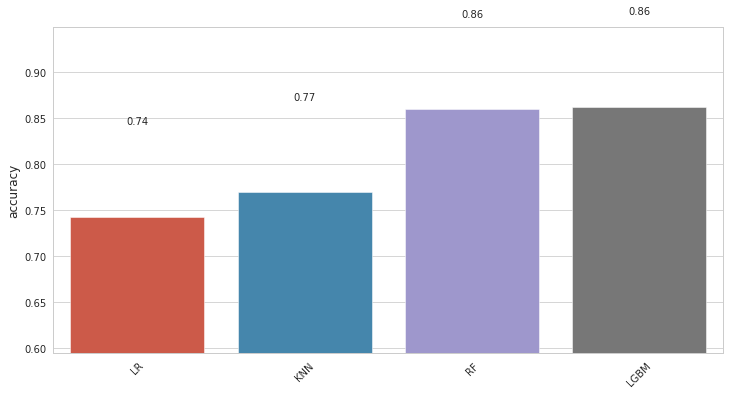

In [42]:
plot_preds(list(tuned_test_preds.keys()),y_test,list(tuned_test_preds.values()), 1)

**CONCLUSION**

1.	14000 people are not looking for a job change and on the other hand approximately 5000 people are willing to change their jobs.

2.	There is no special correlation between the variables with the target function to distinguish the value of the target. Furthermore, categorical variables cannot determine the correlation factor between these variables and the target function.
3.	The target has a high dependance on the city_development_index which means candidates from city with higher amount of development index tends to move towards the field of data science.
